In [2]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

folder_path_class_0 = r"C:\Users\ramez kamal\Desktop\Dataset\with_mask"
folder_path_class_1 = r"C:\Users\ramez kamal\Desktop\Dataset\without_mask"

images_class_0, labels_class_0 = load_images_from_folder(folder_path_class_0, 0)
images_class_1, labels_class_1 = load_images_from_folder(folder_path_class_1, 1)

images = images_class_0 + images_class_1
labels = labels_class_0 + labels_class_1


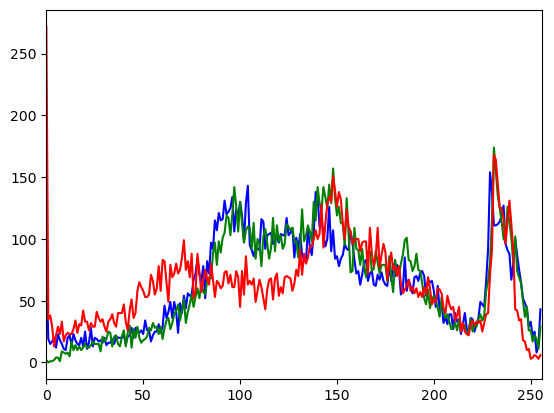

In [3]:
import matplotlib.pyplot as plt

def plot_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.show()

plot_histogram(images[0])


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

X = np.array([cv2.resize(img, (64, 64)) for img in images]) / 255.0
y = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


C:\Users\ramez kamal\.anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.8473 - loss: 0.3758 - val_accuracy: 0.9490 - val_loss: 0.1480
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9665 - loss: 0.0958 - val_accuracy: 0.9791 - val_loss: 0.0698
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.9816 - loss: 0.0536 - val_accuracy: 0.9757 - val_loss: 0.0763
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9821 - loss: 0.0440 - val_accuracy: 0.9833 - val_loss: 0.0617
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.9925 - loss: 0.0273 - val_accuracy: 0.9858 - val_loss: 0.0616
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9944 - loss: 0.0227 - val_accuracy: 0.9808 - val_loss: 0.0679
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9953 - loss: 0.0211 - val_accuracy: 0.9841 - val_loss: 0.0643
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9992 - loss: 0

In [7]:
model_save_path = r'C:\Users\ramez kamal\Desktop\Dataset/my_model.h5'
model.save(model_save_path)
print('all done')

all done


In [8]:
import cv2
import tensorflow as tf
import numpy as np

# تحميل النموذج المدرب
model_path = r"C:\Users\ramez kamal\Desktop\Dataset\my_model.h5"
model = tf.keras.models.load_model(model_path)

# فتح الكاميرا
cap = cv2.VideoCapture(0)

def preprocess_image(img):
    img = cv2.resize(img, (64, 64))  # تغيير حجم الصورة بما يتوافق مع المدخلات المطلوبة للنموذج
    img = img / 255.0  # تطبيع الصورة
    img = np.expand_dims(img, axis=0)  # إضافة بعد لتتناسب مع مدخلات النموذج (1, 64, 64, 3)
    return img

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # معالجة الإطار من الكاميرا
    processed_frame = preprocess_image(frame)
    
    # استخدام النموذج للتنبؤ
    prediction = model.predict(processed_frame)
    label = "Wearing Mask" if prediction[0][0] > 0.5 else "Not Wearing Mask"

    # عرض النتيجة على الإطار
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if label == "Wearing Mask" else (0, 0, 255), 2)
    cv2.imshow('Mask Detection', frame)

    # إيقاف العرض عند الضغط على مفتاح 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# تحرير الكاميرا وإغلاق جميع النوافذ
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━